#A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
## Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import export_graphviz 
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt

# 1. Data Collection and description

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Company_Data.csv to Company_Data.csv


In [ ]:
df= pd.read_csv('Company_Data.csv')

In [ ]:
df1= df.copy()

In [ ]:
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [ ]:
df1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
df1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [ ]:
df1.shape

(400, 11)

### Outlier Check

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


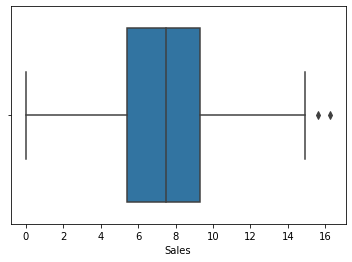

In [ ]:
ax= sns.boxplot(df1['Sales'])

### The data has 2 outlier instances

In [ ]:
plt.rcParams['figure.figsize']= 9,5

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


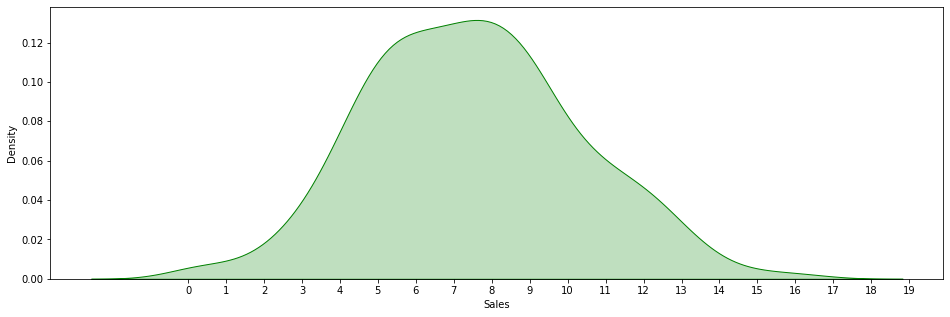

In [ ]:
plt.figure(figsize=(16,5))
print('Skew: {}'.format(df1['Sales'].skew()))
print('Kurtosis: {}'.format(df1['Sales'].kurtosis()))
ax= sns.kdeplot(df1['Sales'],shade=True, color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

'''The data is Skewed on the right & has negative Kurtosis'''

In [ ]:
obj_colum= df1.select_dtypes(include='object').columns.tolist()

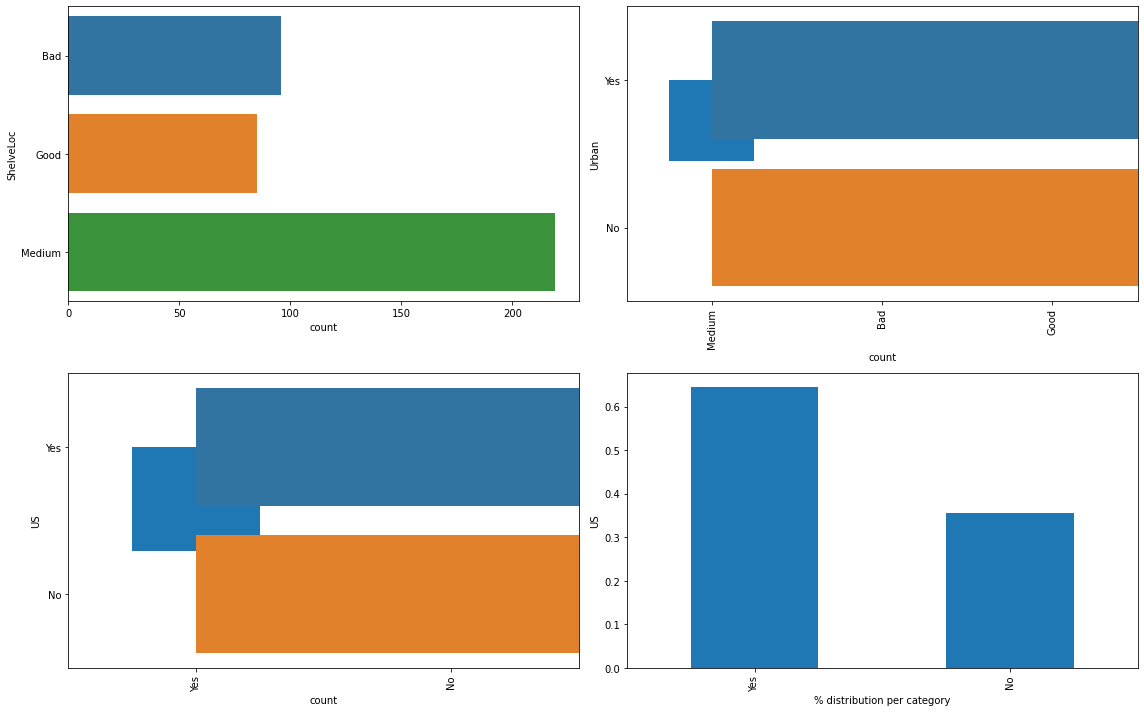

In [ ]:
plt.figure(figsize=(16,10))
for i, col in enumerate(obj_colum,1):
  plt.subplot(2,2,i)
  sns.countplot(data=df1, y=col)
  plt.subplot(2,2,i+1)
  df1[col].value_counts(normalize= True).plot.bar()
  plt.ylabel(col)
  plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [ ]:
num_columns= df1.select_dtypes(exclude= 'object').columns.tolist()

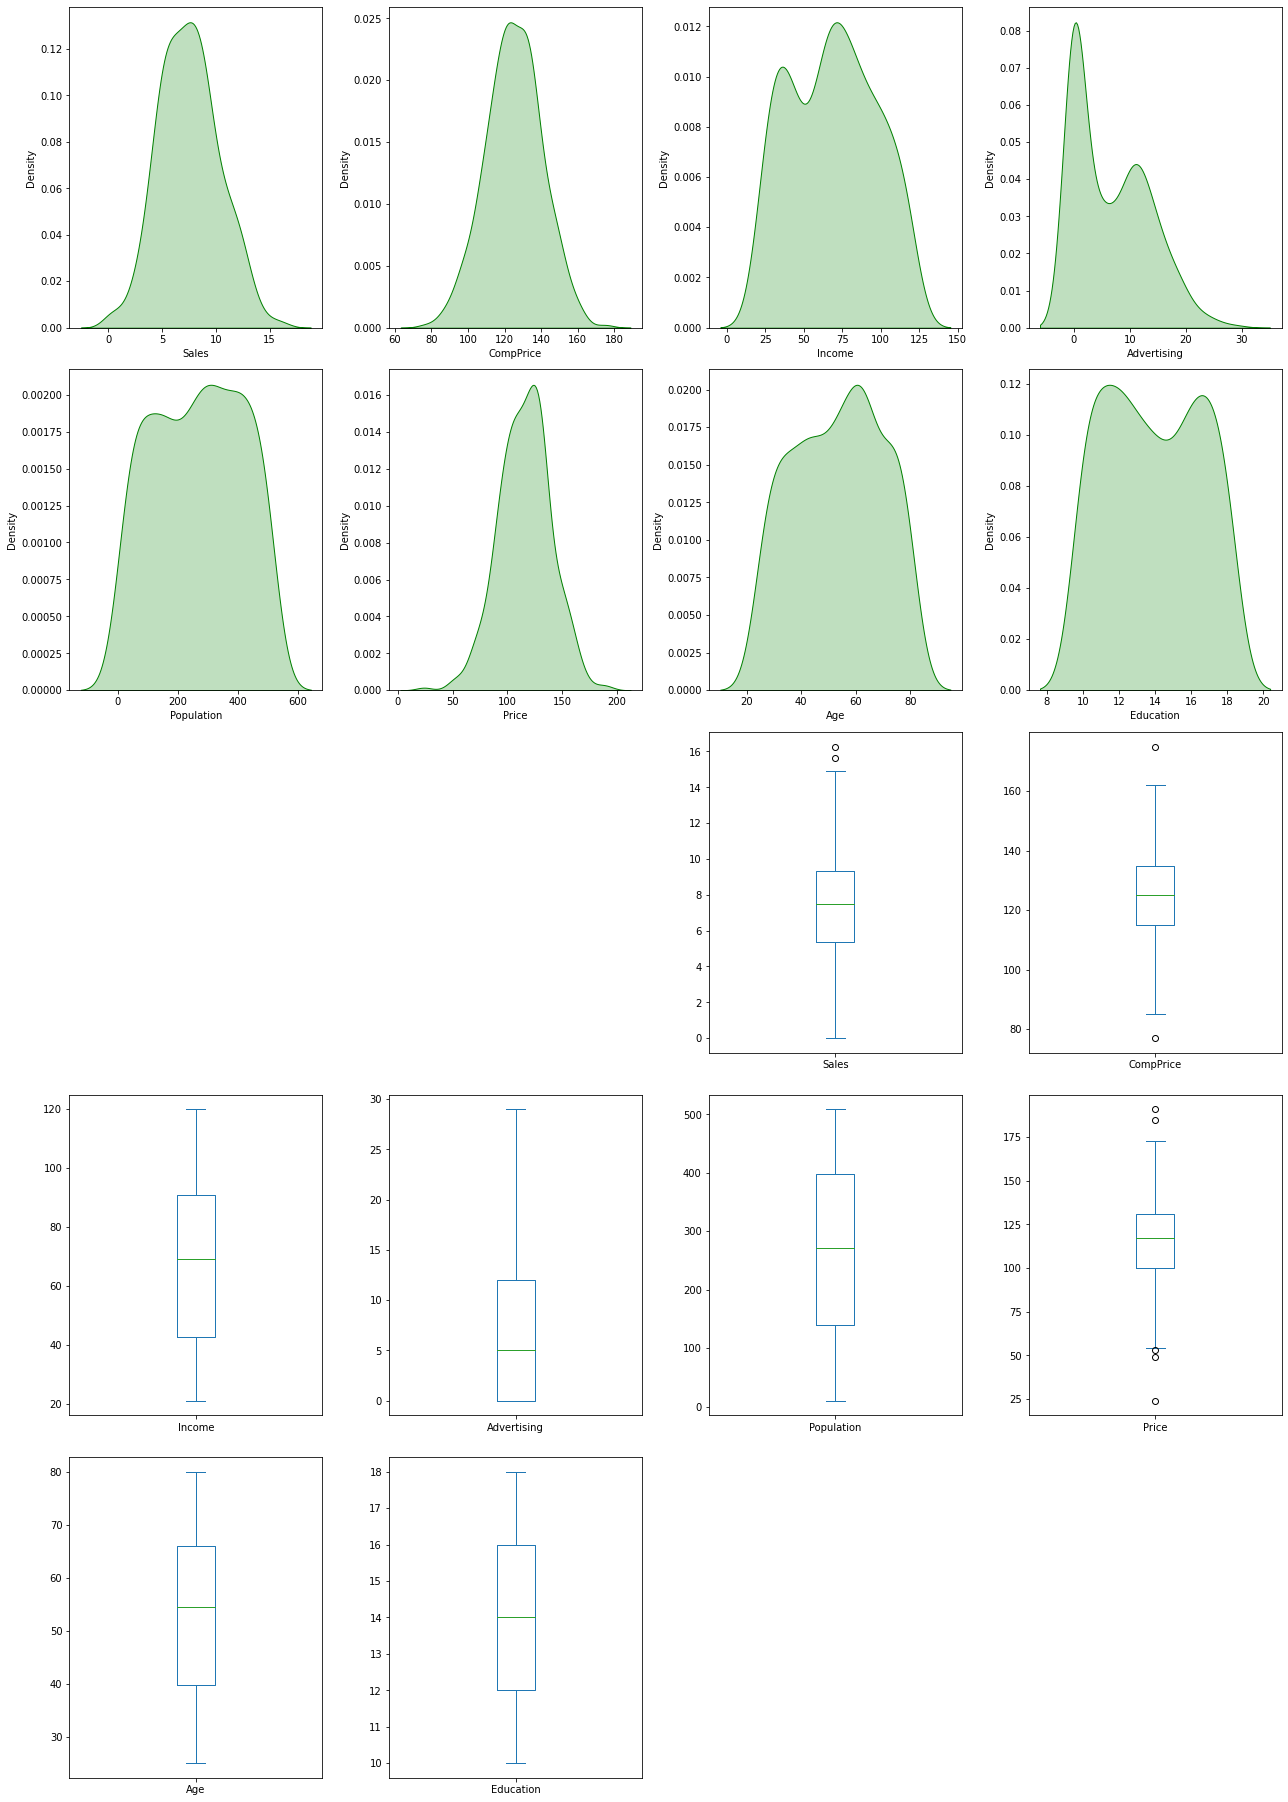

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [ ]:
plt.figure(figsize=(18,40))
for i, col in enumerate(num_columns,1):
  plt.subplot(8,4,i)
  sns.kdeplot(df[col], color='g',shade=True)
  plt.subplot(8,4,i+10)
  df[col].plot.box()
plt.tight_layout()
plt.show()
num_data= df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()], index=['skewness', 'kurtosis'])

In [ ]:
corr= df1.corr()

In [ ]:
df1= pd.get_dummies(df1,columns= ['ShelveLoc', 'Urban', 'US'])

In [ ]:
corr= df1.corr()

<AxesSubplot:>

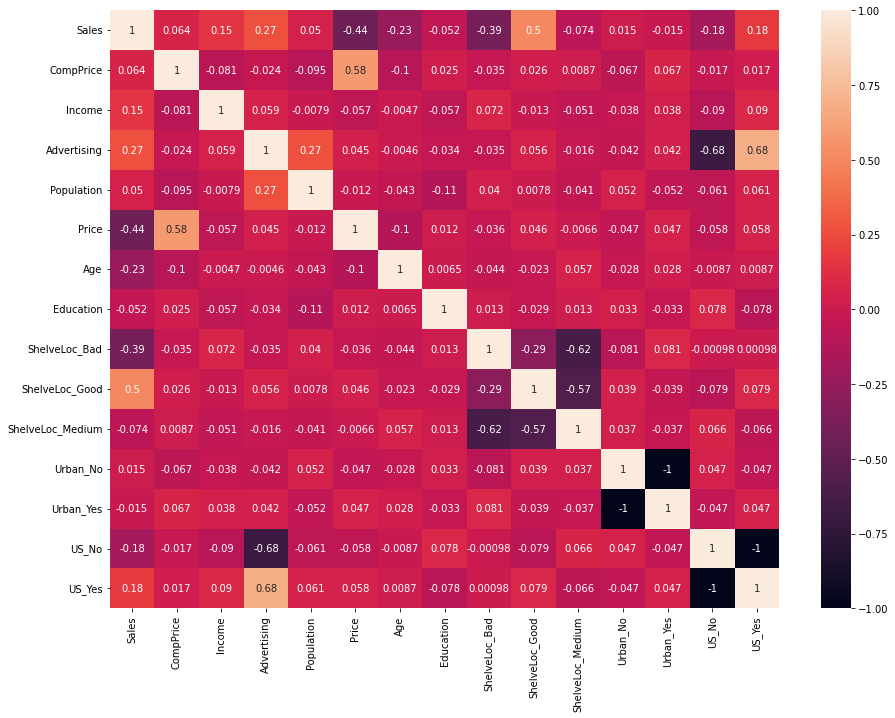

In [ ]:
plt.figure(figsize= (15,11))
sns.heatmap(corr, annot= True)

# 2. Random Forest - Model

### Since the target variable is continious, we create a class of the value based on the mean

### <= 7.49 == "Small" and > 7.49 == "large"

In [ ]:
df1['sales']= 'small'
df1.loc[df1['Sales']> 7.49,'sales']= 'large'
df1.drop(['Sales'], axis=1, inplace= True)

In [ ]:
X = df1.iloc[:,0:14]
y = df1.iloc[:,14]

In [ ]:
x_train, x_test,y_train, y_test= train_test_split(X,y,test_size= 0.2)

In [ ]:
y_train.value_counts()

large    163
small    157
Name: sales, dtype: int64

In [ ]:
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.7875

In [ ]:
pred_train= model.predict(x_train)

In [ ]:
accuracy_score(y_train, pred_train)

1.0

In [ ]:
confusion_matrix(y_train, pred_train)

array([[163,   0],
       [  0, 157]])

In [ ]:
pred_test= model.predict(x_test)

In [ ]:
accuracy_score(y_test, pred_test)

0.8125

In [ ]:
confusion_matrix(y_test, pred_test)

array([[28,  8],
       [ 7, 37]])

In [ ]:
df_t= pd.DataFrame({'Actual' : y_test, 'Predicted': pred_test})

In [ ]:
df_t

,Actual,Predicted
314,large,large
195,small,small
27,small,small
16,large,large
20,small,small
...,...,...
313,large,large
316,large,large
166,small,small
307,small,small


In [ ]:
cols= list(df1.columns)

In [ ]:
predictors= cols[0:14]
target= cols[14]

In [ ]:
tree1 = model.estimators_[20]

In [ ]:
dot_data= StringIO()

In [ ]:
export_graphviz(tree1, out_file = dot_data, feature_names =predictors, class_names = target, filled =True,rounded=True,impurity =False,proportion=False,precision =2)


In [ ]:
graph= pydotplus.graph_from_dot_data(dot_data.getvalue())

# 3- Conclusion
'''Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 81%
As seen in the confusion matrix of Test data 65 instances are predicted correctly and 15 instances are not'''

In [ ]:

rf_small = RF(n_estimators=10, max_depth = 3)

In [ ]:

rf_small.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [ ]:
tree_small = rf_small.estimators_[5]

In [ ]:
export_graphviz(tree_small, out_file = dot_data, feature_names = predictors, rounded = True, precision = 1)


In [ ]:
graph_small = pydotplus.graph_from_dot_data(dot_data.getvalue())


In [ ]:
graph.write_png('company_full.png')

True

In [ ]:
img = mpimg.imread('company_full.png') 

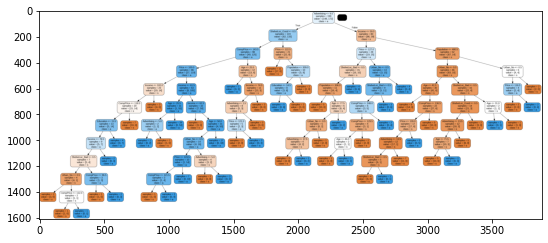

In [ ]:
plt.imshow(img)

In [ ]:
model.feature_importances_

array([0.11687718, 0.10301144, 0.09248946, 0.08751945, 0.23273164,
       0.11502847, 0.06180114, 0.04061214, 0.076746  , 0.02783786,
       0.01058251, 0.0119512 , 0.01225677, 0.01055475])

In [ ]:
fi= pd.DataFrame({'feature': list(x_train.columns), 'importance': model.feature_importances_}).sort_values('importance', ascending= False)

In [ ]:
fi

,feature,importance
4,Price,0.232732
0,CompPrice,0.116877
5,Age,0.115028
1,Income,0.103011
2,Advertising,0.092489
3,Population,0.087519
8,ShelveLoc_Good,0.076746
6,Education,0.061801
7,ShelveLoc_Bad,0.040612
9,ShelveLoc_Medium,0.027838


### As seen in the above table Price is most important feature